# Explore Playlist Dynamics of Top200 Rankings


### Playlist Dynamics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5000)
%matplotlib inline

Settings for getting figures in high resolution

In [2]:
# sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
# sns.set_context('notebook')
# sns.set_style("ticks")

In [3]:
df=pd.read_pickle('./dataset_/dataset_cleaned_popularity.pkl')
df.drop(columns=['index', 'level_0'], inplace=True)  # Comes from pickeling the file
df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,10,1.0,1.0,global,4.31065,2018,11,5
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,191,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,1,1.0,1.0,spanish speaking,4.31065,2018,11,5
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,126,0.0,0.0,english speaking and nordic,4.31065,2018,11,5
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,4,hip hop,740.0,1.0,1,0,21,0.0,1.0,english speaking and nordic,4.31065,2018,11,5


Take a look into the global playlist and make sense of why we have so many songs in it. Assumption is that each playlist should only have 200 songs in it.

In [5]:
df[df['country'] == 'Global']['title'].value_counts()

intro                                                                                        8
paradise                                                                                     6
all night                                                                                    6
sleigh ride                                                                                  6
have yourself a merry little christmas                                                       5
x                                                                                            5
baby                                                                                         5
christmas time                                                                               5
changes                                                                                      5
stay                                                                                         5
christmas                                         

Check multiple songs based on the example of the song sleigh ride.

In [6]:
df[(df['country'] == 'Global') & (df['title'] == 'sleigh ride')]

,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
15215,Global,https://open.spotify.com/track/4ukUoXLuFzMixyZ...,200.15,sleigh ride,Ella Fitzgerald,album,adult standards,1766898.0,False,Ella Wishes You A Swinging Christmas (Expanded...,1960-01-01,5,18,0.508,0.287,1,-12.472,1,0.0523,0.764,0.000000,0.1530,0.644,154.759,4,pop,22224.0,0.0,1,0,79,0.0,0.0,global,2.933117,1960,1,1
16619,Global,https://open.spotify.com/track/597IVBYr60vm0HK...,248.55,sleigh ride,Carpenters,album,adult standards,1562181.0,False,Christmas Portrait (Special Edition),1978,5,21,0.694,0.243,11,-15.632,1,0.0723,0.871,0.000000,0.1650,0.578,100.774,4,pop,15115.0,False,1,0,90,0.0,0.0,global,2.657333,1978,1,1
38848,Global,https://open.spotify.com/track/6XAdcAseYtijN0Q...,76.00,sleigh ride,Johnny Mathis,album,adult standards,243064.0,False,Merry Christmas,1958-10-06,3,12,0.605,0.663,1,-8.949,1,0.0274,0.699,0.000000,0.1210,0.893,103.180,4,pop,22676.0,0.0,1,0,132,0.0,0.0,global,2.978667,1958,10,6
46766,Global,https://open.spotify.com/track/1ODZGydlown4Ves...,2169.35,sleigh ride,The Ronettes,album,brill building pop,153854.0,False,NOW 100 Hits Christmas,2019-11-08,9,100,0.527,0.768,2,-7.557,1,0.0304,0.457,0.000002,0.3040,0.799,91.750,4,pop,372.0,1.0,1,0,23,0.0,1.0,global,3.013883,2019,11,8
49133,Global,https://open.spotify.com/track/5ymVfeMK8cDew5v...,76.00,sleigh ride,Andy Williams,album,adult standards,315467.0,False,Merry Christmas,1965,1,12,0.571,0.634,5,-9.155,0,0.0537,0.724,0.000000,0.0864,0.805,109.575,4,pop,19863.0,False,1,0,138,0.0,0.0,global,2.140000,1965,1,1
76936,Global,https://open.spotify.com/track/5ASM6Qjiav2xPe7...,1368.15,sleigh ride,The Ronettes,compilation,brill building pop,153854.0,False,A Christmas Gift For You From Phil Spector,1963,5,13,0.529,0.772,2,-7.013,1,0.0287,0.403,0.000002,0.3160,0.853,91.751,4,pop,20594.0,False,1,0,20,0.0,1.0,global,3.021117,1963,1,1


We have muliple songs with the same name in this example or placed in different albums. The problem is that if a song is listed in two playlists it should still have the same popularity. Also the numeric music features are different in both songs, what might be possible because one song has a new release date and maybe has a better song quality. 

In [7]:
df[(df['country'] == 'Global')]['uri'].value_counts()


https://open.spotify.com/track/6FyRXC8tJUh863JCkyWqtk    1
https://open.spotify.com/track/3kml9ZdpT7UYk1ugkjqOzt    1
https://open.spotify.com/track/5p3JJehpKHjr9pJT5eD2Lz    1
https://open.spotify.com/track/64kfyGcf5dvbw92Vv4THCj    1
https://open.spotify.com/track/6cX1iTffMIAU8lEWSOYIIO    1
                                                        ..
https://open.spotify.com/track/4TzXqUIcdpAmre24puQ6Uu    1
https://open.spotify.com/track/6XjEOPgbgHKcaHcunEHSJJ    1
https://open.spotify.com/track/05KOgYg8PGeJyyWBPi5ja8    1
https://open.spotify.com/track/3ZVw1HR1QAQoKBygbhG4CE    1
https://open.spotify.com/track/7cfvP13Bqb1EyCZQiYsLum    1
Name: uri, Length: 5423, dtype: int64

The top200 ranking of course is not static for a period of 4 years so we have many more songs that are listed over the years. 

[Text(0.5, 1.0, 'Dynamics of Country Playlists'),
 Text(0.5, 0, 'Playlists'),
 Text(0, 0.5, 'Song Count')]

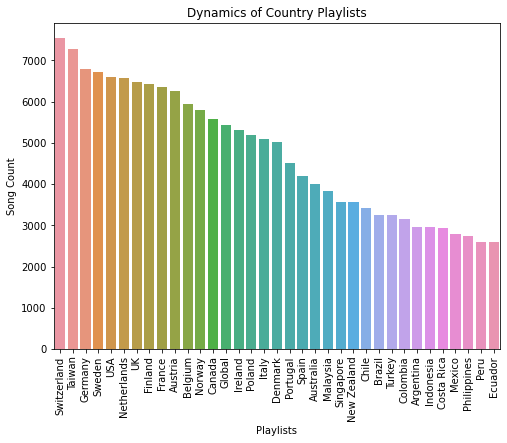

In [8]:
df['country'].value_counts()
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='country', data=df, order=df.country.value_counts().index)
ax.tick_params(axis='x', rotation=90)
ax.set(title='Dynamics of Country Playlists', xlabel='Playlists', ylabel='Song Count')

There is a big difference between western countries and none western countries if we look at the songs listed over a period of 4 years. More music industry heavy countries produce more newcomer artists from which not all of them can make it to the top of the ranking.

Lets focus more on an artists level based analysis. First we take a look at Ed Sheeran and see what songs performed well.

In [9]:
popular_ed_sheeran_songs = df[(df['country'] == 'Global') & (df['artist'] == 'Ed Sheeran')].sort_values(by=['popularity'], ascending=False)['title'][:10]
popular_ed_sheeran_songs

52220          shape of you
14124               perfect
21172           galway girl
27953    castle on the hill
26842            photograph
17500     thinking out loud
50315               happier
72484                  dive
44856       what do i know?
11142    how would you feel
Name: title, dtype: object

In [10]:
df[(df['country'] == 'Global') & (df['artist'] == 'Ed Sheeran')
   ].sort_values(by=['popularity'], ascending=False)


,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
52220,Global,https://open.spotify.com/track/7qiZfU4dY1lWllz...,221571.00,shape of you,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),2017-03-03,4,16,0.825,0.6520,1,-3.183,0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,4,pop,1349.0,1.0,1,0,1,1.0,1.0,global,3.895217,2017,3,3
14124,Global,https://open.spotify.com/track/0tgVpDi06FyKpA1...,129769.90,perfect,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),2017-03-03,5,16,0.599,0.4480,8,-6.312,1,0.0232,0.1630,0.000000,0.1060,0.168,95.050,3,pop,1349.0,1.0,1,0,3,1.0,1.0,global,4.390000,2017,3,3
21172,Global,https://open.spotify.com/track/0afhq8XCExXpqaz...,47431.00,galway girl,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),2017-03-03,6,16,0.624,0.8760,9,-3.374,1,0.1000,0.0735,0.000000,0.3270,0.781,99.943,4,pop,1349.0,1.0,1,0,2,1.0,1.0,global,2.847117,2017,3,3
27953,Global,https://open.spotify.com/track/6PCUP3dWmTjcTtX...,45156.15,castle on the hill,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),2017-03-03,2,16,0.461,0.8340,2,-4.868,1,0.0989,0.0232,0.000011,0.1400,0.471,135.007,4,pop,1349.0,1.0,1,0,2,1.0,1.0,global,4.352567,2017,3,3
26842,Global,https://open.spotify.com/track/6fxVffaTuwjgEk5...,42366.70,photograph,Ed Sheeran,album,pop,71783101.0,False,x (Wembley Edition),2013,6,24,0.614,0.3790,4,-10.480,1,0.0476,0.6070,0.000464,0.0986,0.201,107.989,4,pop,2331.0,False,1,0,40,0.0,1.0,global,4.316450,2013,1,1
17500,Global,https://open.spotify.com/track/1Slwb6dOYkBlWal...,34336.10,thinking out loud,Ed Sheeran,album,pop,71783101.0,False,x (Wembley Edition),2013,11,24,0.781,0.4450,2,-6.061,1,0.0295,0.4740,0.000000,0.1840,0.591,78.998,4,pop,2331.0,False,1,0,43,0.0,1.0,global,4.692667,2013,1,1
50315,Global,https://open.spotify.com/track/2RttW7RAu5nOAfq...,31923.85,happier,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),2017-03-03,7,16,0.522,0.3850,0,-7.355,1,0.0288,0.5360,0.000000,0.1350,0.236,89.792,4,pop,1349.0,1.0,1,0,7,1.0,1.0,global,3.458667,2017,3,3
72484,Global,https://open.spotify.com/track/51ChrwmUPDJvedP...,10946.55,dive,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),2017-03-03,3,16,0.761,0.3860,4,-6.158,1,0.0399,0.3550,0.000000,0.0953,0.526,134.943,3,pop,1349.0,1.0,1,0,9,1.0,1.0,global,3.974000,2017,3,3
44856,Global,https://open.spotify.com/track/2pJZ1v8HezrAoZ0...,8037.20,what do i know?,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),2017-03-03,10,16,0.838,0.4920,1,-5.690,0,0.0380,0.2510,0.000000,0.2620,0.895,115.092,4,pop,1349.0,1.0,1,0,12,0.0,1.0,global,3.955550,2017,3,3
11142,Global,https://open.spotify.com/track/6PJ8FF6UR8FZXfE...,7362.35,how would you feel,Ed Sheeran,album,pop,71783101.0,False,÷ (Deluxe),2017-03-03,11,16,0.617,0.4390,9,-5.630,1,0.0269,0.4240,0.000000,0.1270,0.242,139.979,4,pop,1349.0,1.0,1,0,14,0.0,1.0,global,4.675550,2017,3,3


Lets find the most popular artist with only one listed song.

In [11]:
df[(df['country'] == 'Global')]['artist'].value_counts().tail(20)


Justin Bieber - BloodPop®                                                  1
DJ Khaled - Rihanna - Bryson Tiller                                        1
Cauty - Brytiago - Darell - Cosculluela - Rafa Pabön - Chencho Corleone    1
Trippie Redd - Baby Goth                                                   1
Dixie D’Amelio                                                             1
Robyn                                                                      1
Haftbefehl - SHIRIN DAVID                                                  1
Rvssian - Anuel AA - Juice WRLD                                            1
Doja Cat - Gucci Mane                                                      1
Lil Skies - Yung Pinch                                                     1
Nacho - Yandel - Bad Bunny - Mambo Kingz - DJ Luian                        1
Future - Rihanna                                                           1
Céline Dion                                                                1

In [12]:
s = df[df['country'] == 'Global']['artist'].value_counts()
artists_w_one_track = s[s == 1].index
artists_w_one_track

Index(['Tory Lanez - Meek Mill', 'Nause - Pretty Sister',
       'Kiiara - Felix Snow', 'Sia - David Guetta - Afrojack', 'Bausa',
       '6ix9ine - Gunna', 'KIDS SEE GHOSTS - Louis Prima', 'OutKast',
       'Dua Lipa - Miguel', 'Lil Yachty - Quavo',
       ...
       'Nacho - Yandel - Bad Bunny - Mambo Kingz - DJ Luian',
       'Future - Rihanna', 'Céline Dion', 'Anitta - Swae Lee',
       'Ir Sais - Rauw Alejandro', 'U2', 'Kygo - Ellie Goulding',
       'Matthew Wilder', 'Rudimental - Ed Sheeran', 'Dj Kass'],
      dtype='object', length=1935)

In [13]:

df[(df['country'] == 'Global') & (df['artist'].isin(artists_w_one_track))].sort_values(by=['popularity'], ascending=False).head(20)


,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
12449,Global,https://open.spotify.com/track/2dpaYNEQHiRxtZb...,111270.55,happier,Marshmello - Bastille,single,brostep,27670203.0,False,Happier,2018-08-17,1,1,0.687,0.792,5,-2.749,1,0.0452,0.1910,0.000000,0.1670,0.6710,100.015,4,dance/electronic,820.0,1.0,1,0,2,1.0,1.0,global,3.571500,2018,8,17
20108,Global,https://open.spotify.com/track/0u2P5u6lvoDfwTY...,88813.70,lovely,Billie Eilish - Khalid,single,electropop,34697267.0,False,lovely (with Khalid),2018-04-19,1,1,0.351,0.296,4,-10.109,0,0.0333,0.9340,0.000000,0.0950,0.1200,115.284,4,pop,940.0,1.0,1,0,19,0.0,1.0,global,3.336433,2018,4,19
29505,Global,https://open.spotify.com/track/3a1lNhkSLSkpJE4...,85444.85,congratulations,Post Malone - Quavo,album,dfw rap,29173640.0,True,Stoney (Deluxe),2016-12-09,12,18,0.630,0.804,6,-4.183,1,0.0363,0.2150,0.000000,0.2530,0.4920,123.146,4,rap,1427.0,0.0,0,1,20,0.0,1.0,global,3.671550,2016,12,9
17796,Global,https://open.spotify.com/track/6RUKPb4LETWmmr3...,82367.25,something just like this,The Chainsmokers - Coldplay,album,dance pop,16931568.0,False,Memories...Do Not Open,2017-04-07,5,12,0.617,0.635,11,-6.769,0,0.0317,0.0498,0.000014,0.1640,0.4460,103.019,4,pop,1314.0,1.0,1,0,2,1.0,1.0,global,4.119333,2017,4,7
16432,Global,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,77114.60,the box,Roddy Ricch,album,melodic rap,4688338.0,True,Please Excuse Me For Being Antisocial,2019-12-06,2,16,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.6420,116.971,4,rap,344.0,1.0,0,1,1,1.0,1.0,global,3.277550,2019,12,6
4066,Global,https://open.spotify.com/track/58q2HKrzhC3ozto...,75015.80,i like it,Cardi B - Bad Bunny - J Balvin,album,pop,13132135.0,True,Invasion of Privacy,2018-04-06,7,13,0.816,0.726,5,-3.998,0,0.1290,0.0990,0.000000,0.3720,0.6500,136.048,4,pop,953.0,1.0,0,1,2,1.0,1.0,global,4.223167,2018,4,6
68311,Global,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,70440.85,closer,The Chainsmokers - Halsey,single,dance pop,16931568.0,False,Closer,2016-07-29,1,1,0.748,0.524,8,-5.599,1,0.0338,0.4140,0.000000,0.1110,0.6610,95.010,4,pop,1560.0,0.0,1,0,2,1.0,1.0,global,4.082667,2016,7,29
47319,Global,https://open.spotify.com/track/7ef4DlsgrMEH11c...,66502.05,one kiss,Calvin Harris - Dua Lipa,single,dance pop,20814678.0,False,One Kiss (with Dua Lipa),2018-04-06,1,1,0.791,0.862,9,-3.240,0,0.1100,0.0370,0.000022,0.0814,0.5920,123.994,4,pop,953.0,1.0,1,0,1,1.0,1.0,global,3.580783,2018,4,6
35752,Global,https://open.spotify.com/track/4aWmUDTfIPGksMN...,64239.90,despacito,Luis Fonsi - Daddy Yankee,single,latin,8932627.0,False,Despacito (Featuring Daddy Yankee),2017-01-13,1,1,0.660,0.786,2,-4.757,1,0.1700,0.2090,0.000000,0.1120,0.8460,177.833,4,latin,1397.0,1.0,1,0,1,1.0,1.0,global,3.803333,2017,1,13
19628,Global,https://open.spotify.com/track/7k4t7uLgtOxPwTp...,63930.30,tusa,KAROL G - Nicki Minaj,single,latin,12839172.0,False,Tusa,2019-11-07,1,1,0.803,0.715,2,-3.280,1,0.2980,0.2950,0.000134,0.0574,0.5740,101.085,4,latin,373.0,1.0,1,0,3,1.0,1.0,global,3.349333,2019,11,7


In [14]:
df[(df['country'] == 'Global') &
   (df['artist'].isin(artists_w_one_track)) &
   (~df['artist'].str.contains('-'))
   ].sort_values(by=['popularity'], ascending=False).head(20)


,country,uri,popularity,title,artist,release_type,sub_genre,artist_followers,explicit,album,release_date,track_number,tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveness,valence,tempo,time_signature,genre,days_since_release,released_after_2017,explicit_false,explicit_true,popu_max,top10_dummy,top50_dummy,cluster,duration_min,release_year,release_month,release_day
16432,Global,https://open.spotify.com/track/0nbXyq5TXYPCO7p...,77114.60,the box,Roddy Ricch,album,melodic rap,4688338.0,True,Please Excuse Me For Being Antisocial,2019-12-06,2,16,0.896,0.586,10,-6.687,0,0.0559,0.1040,0.000000,0.7900,0.6420,116.971,4,rap,344.0,1.0,0,1,1,1.0,1.0,global,3.277550,2019,12,6
52050,Global,https://open.spotify.com/track/2tnVG71enUj33Ic...,55788.20,ride it,Regard,single,edm,105987.0,False,Ride It,2019-07-26,1,1,0.880,0.751,7,-4.258,0,0.0874,0.1770,0.000064,0.1060,0.8840,117.948,4,dance/electronic,477.0,1.0,1,0,12,0.0,1.0,global,2.626767,2019,7,26
19704,Global,https://open.spotify.com/track/6QgjcU0zLnzq5Or...,49207.95,feel it still,Portugal. The Man,album,indie rock,1152895.0,False,Woodstock,2017-06-16,4,10,0.801,0.795,1,-5.115,0,0.0504,0.0417,0.000113,0.0717,0.7540,79.028,4,rock,1247.0,1.0,1,0,17,0.0,1.0,global,2.720883,2017,6,16
44695,Global,https://open.spotify.com/track/1Cv1YLb4q0RzL6p...,38166.15,sunday best,Surfaces,album,bedroom soul,605105.0,False,Where the Light Is,2019-01-06,7,10,0.878,0.525,5,-6.832,1,0.0578,0.1830,0.000000,0.0714,0.6940,112.022,4,r&b/soul,678.0,1.0,1,0,12,0.0,1.0,global,2.642850,2019,1,6
14794,Global,https://open.spotify.com/track/6HUnnBwYZqcED1e...,33494.65,solo dance,Martin Jensen,single,big room,991761.0,False,Solo Dance,2016-11-04,1,1,0.744,0.836,6,-2.396,0,0.0507,0.0435,0.000000,0.1940,0.3600,114.965,4,house,1462.0,0.0,1,0,24,0.0,1.0,global,2.915550,2016,11,4
15615,Global,https://open.spotify.com/track/7mldq42yDuxiUNn...,24233.60,body like a back road,Sam Hunt,single,contemporary country,1970425.0,False,Body Like A Back Road,2017-02-01,1,1,0.732,0.458,5,-7.225,1,0.0311,0.4470,0.000000,0.1360,0.6610,98.938,4,country,1378.0,1.0,1,0,55,0.0,0.0,global,2.756450,2017,2,1
43337,Global,https://open.spotify.com/track/2FRnf9qhLbvw8fu...,23724.45,last christmas,Wham!,single,dance pop,1366478.0,False,LAST CHRISTMAS,1984-11-29,1,3,0.735,0.478,2,-12.472,1,0.0293,0.1890,0.000002,0.3550,0.9470,107.682,4,pop,13125.0,0.0,1,0,2,1.0,1.0,global,4.382667,1984,11,29
61812,Global,https://open.spotify.com/track/14mHfNsSHN0FbLf...,20955.55,leave me alone,Flipp Dinero,single,hip hop,743167.0,True,Leave Me Alone,2018-09-04,1,1,0.792,0.743,7,-2.806,1,0.0851,0.1070,0.000000,0.1830,0.7420,150.024,4,hip hop,802.0,1.0,0,1,31,0.0,1.0,global,3.260617,2018,9,4
5657,Global,https://open.spotify.com/track/0VKkyBKCXyR99na...,20310.75,la player,Zion & Lennox,single,latin,4767484.0,False,La Player (Bandolera),2018-02-23,1,1,0.769,0.838,2,-5.238,1,0.0633,0.1600,0.000000,0.0935,0.6020,93.996,4,latin,995.0,1.0,1,0,47,0.0,1.0,global,4.160150,2018,2,23
28457,Global,https://open.spotify.com/track/1CnPYaKxTVb4LWO...,17502.65,all time low,Jon Bellion,album,pop rap,1140268.0,True,The Human Condition,2016-06-10,3,14,0.617,0.567,0,-4.188,1,0.0828,0.0584,0.000000,0.0933,0.5050,90.246,4,pop,1609.0,0.0,0,1,29,0.0,1.0,global,3.626717,2016,6,10


In [15]:
# Exclude all artist collaborations
none_famous_artists = df[(df['country'] == 'Global') & 
                         (df['artist'].isin(artists_w_one_track)) & 
                         (~df['artist'].str.contains('-'))
                         ].sort_values(by=['popularity'], ascending=False)['uri'][:10]
none_famous_artists


16432    https://open.spotify.com/track/0nbXyq5TXYPCO7p...
52050    https://open.spotify.com/track/2tnVG71enUj33Ic...
19704    https://open.spotify.com/track/6QgjcU0zLnzq5Or...
44695    https://open.spotify.com/track/1Cv1YLb4q0RzL6p...
14794    https://open.spotify.com/track/6HUnnBwYZqcED1e...
15615    https://open.spotify.com/track/7mldq42yDuxiUNn...
43337    https://open.spotify.com/track/2FRnf9qhLbvw8fu...
61812    https://open.spotify.com/track/14mHfNsSHN0FbLf...
5657     https://open.spotify.com/track/0VKkyBKCXyR99na...
28457    https://open.spotify.com/track/1CnPYaKxTVb4LWO...
Name: uri, dtype: object

### Dynamics of songs from full database

In [16]:
df_db = pd.read_csv('.\dataset_\Database to calculate popularity.csv\Database to calculate popularity.csv')
df_db.head(10)

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber
5,5,Global,05/11/2020,6.0,https://open.spotify.com/track/1tkg4EHVoqnhR6i...,"What You Know Bout Love , Pop Smoke",What You Know Bout Love,Pop Smoke
6,6,Global,05/11/2020,7.0,https://open.spotify.com/track/0t1kP63rueHleOh...,"Dynamite , BTS",Dynamite,BTS
7,7,Global,05/11/2020,8.0,https://open.spotify.com/track/1yoMvmasuxZfqHE...,"Hawái , Maluma",Hawái,Maluma
8,8,Global,05/11/2020,9.0,https://open.spotify.com/track/6Im9k8u9iIzKMrm...,"34+35 , Ariana Grande",34+35,Ariana Grande
9,9,Global,05/11/2020,10.0,https://open.spotify.com/track/4Oun2ylbjFKMPTi...,"WAP , Cardi B",WAP,Cardi B


In [17]:
df_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9807001 entries, 0 to 9807000
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   country     object 
 2   date        object 
 3   position    float64
 4   uri         object 
 5   track       object 
 6   title       object 
 7   artist      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 598.6+ MB


In [18]:
df_db = df_db.replace(r"^ +| +$", r"", regex=True)  # Delete leading and trailing

In [ ]:
df_db['title'] = df_db['title'].str.lower()

In [ ]:
df_db = df_db.astype({'position': int}, errors='ignore')

In [ ]:
df_db['date'] = pd.to_datetime(df_db['date'], format='%d/%m/%Y')
df_db.head(10)

In [ ]:
df_db.shape

In [ ]:
df_db['position_7day_ave'] = df_db['position'].rolling(3).mean().shift(-3)

In [ ]:
df_db[df_db['country'] == 'Global']

In [ ]:
df_db[df_db['country'] == 'Global']['artist'].value_counts().head(20)

In [ ]:
df_ed_sheeran= df_db[(df_db['country'] == 'Global') & (df_db['artist'] == 'Ed Sheeran')]
df_ed_sheeran.head(20)

In [ ]:
df_db[(df_db['country'] == 'Global') & (df_db['artist'] == 'Ed Sheeran')]['title'].value_counts().head(20)


In [ ]:
popular_ed_sheeran_songs = list(popular_ed_sheeran_songs.values)

In [ ]:
songs_from_2013 = ['photograph', 'thinking out loud']
popular_ed_sheeran_songs_2017 = [song for song in popular_ed_sheeran_songs if song not in songs_from_2013]
popular_ed_sheeran_songs_2013 = [song for song in popular_ed_sheeran_songs if song in songs_from_2013]


In [ ]:
palette = sns.color_palette()
hex = palette.as_hex()
colors = {cat: hex for cat, hex in zip(popular_ed_sheeran_songs_2017[:4], hex[4:])}
colors

In [ ]:
df_ed_sheeran_first4 = df_ed_sheeran[df_ed_sheeran['title'].str.lower().isin(
    popular_ed_sheeran_songs_2017[:4])]
df_ed_sheeran_next4 = df_ed_sheeran[df_ed_sheeran['title'].str.lower().isin(
    popular_ed_sheeran_songs_2017[4:])]
df_ed_sheeran_older = df_ed_sheeran[df_ed_sheeran['title'].str.lower().isin(
    popular_ed_sheeran_songs_2013)]



Now lets take a a look and compare the same top5 songs of ed sheeran in taiwan with global.

In [ ]:
df_taiwan_ed_sheeran = df_db[(df_db['country'] == 'Taiwan') & (df_db['artist'] == 'Ed Sheeran')]
df_taiwan_ed_sheeran_first4 = df_taiwan_ed_sheeran[df_taiwan_ed_sheeran['title'].str.lower().isin(popular_ed_sheeran_songs_2017[:4])]

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_taiwan_ed_sheeran_first4, hue='title', palette=colors)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='Taiwan Ranking Positions of top4 Popular Ed Sheeran Songs')
ax.set(xlim=('2017-01', '2020-07'))


In [ ]:
df_usa_ed_sheeran = df_db[(df_db['country'] == 'USA') & (
    df_db['artist'] == 'Ed Sheeran')]
df_usa_ed_sheeran_first4 = df_usa_ed_sheeran[df_usa_ed_sheeran['title'].str.lower(
).isin(popular_ed_sheeran_songs_2017[:4])]


In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_usa_ed_sheeran_first4, hue='title', palette=colors)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='USA Ranking Positions of top4 Popular Ed Sheeran Songs')
ax.set(xlim=('2017-01', '2020-07'))


In [ ]:
df_uk_ed_sheeran = df_db[(df_db['country'] == 'UK') & (
    df_db['artist'] == 'Ed Sheeran')]
df_uk_ed_sheeran_first4 = df_uk_ed_sheeran[df_uk_ed_sheeran['title'].str.lower(
).isin(popular_ed_sheeran_songs_2017[:4])]


In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_uk_ed_sheeran_first4, hue='title', palette=colors)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='UK Ranking Positions of top4 Popular Ed Sheeran Songs')
ax.set(xlim=('2017-01', '2020-07'))


In [ ]:
df_phil_ed_sheeran = df_db[(df_db['country'] == 'Philippines') & (
    df_db['artist'] == 'Ed Sheeran')]
df_phil_ed_sheeran_first4 = df_phil_ed_sheeran[df_phil_ed_sheeran['title'].str.lower(
).isin(popular_ed_sheeran_songs_2017[:4])]


In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_phil_ed_sheeran_first4, hue='title', palette=colors)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='Philippines Ranking Positions of top4 Popular Ed Sheeran Songs')
ax.set(xlim=('2017-01', '2020-07'))


In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_ed_sheeran_next4, hue='title')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='Global Ranking Positions of top4-8 Popular Ed Sheeran Songs')
ax.set(xlim=('2017-01', '2020-07'))


In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_ed_sheeran_older, hue='title')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='Global Ranking Positions of Ed Sheeran Songs with release date in 2013')
ax.set(xlim=('2017-01', '2020-07'))


In [ ]:
df_ed_sheeran_older_usa = df_usa_ed_sheeran[df_usa_ed_sheeran['title'].str.lower().isin(
    popular_ed_sheeran_songs_2013)]


In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_ed_sheeran_older_usa, hue='title')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='USA Ranking Positions of Ed Sheeran Songs with release date in 2013')
ax.set(xlim=('2017-01', '2020-07'))

In [ ]:
df_luis_fonsi = df_db[(df_db['country'] == 'Global') &
                      (df_db['artist'] == 'Luis Fonsi')]
df_luis_fonsi.head(10)


In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_luis_fonsi, hue='title')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax.invert_yaxis()
ax.set_yticklabels(['', '1', '25', '50', '75', '100',
                   '125', '150', '175', '200'])
ax.set(title='Ranking Position of the Song Despacito: Luis Fonsi')
ax.set(xlim=('2017-01', '2020-07'))


In [ ]:
df_none_popular = df_db[(df_db['uri'].isin(list(none_famous_artists))) & (df_db['country'] == 'Global')]

In [ ]:
df_none_popular['title'].unique()

In [ ]:
# Delete songs that do not match pattern
df_none_popular = df_none_popular[~df_none_popular['title'].isin(['the box', 'sunday best', 'last christmas', 'all time low', 'solo dance'])]

In [ ]:
single_song_artists = list(df_none_popular['artist'].unique())

In [ ]:
plt.figure(figsize=(12, 8))
ax = sns.scatterplot(x='date', y='position',
                     data=df_none_popular, hue='title', legend='full')
ax.yaxis.set_ticks(np.insert(np.arange(25, 225, 25), 0, 0))
ax.invert_yaxis()


ax.set(title='Ranking Position of top5 Global most popular artists that have only one Song')
ax.set(xlim=('2017-01', '2020-07'))
_, legend_labels = ax.get_legend_handles_labels()
new_labels = []
for label, artist in zip(legend_labels, single_song_artists):
    new_labels.append(f'{label}, {artist}')
ax.legend(labels=new_labels, title='Songs from Artists:', bbox_to_anchor=(
    1.05, 1), loc='upper left', borderaxespad=0)


In [ ]:
f, ax = plt.subplots(2, 2, figsize=(18, 14), sharex=True, sharey=True)

sns.scatterplot(x='date', y='position', data=df_ed_sheeran_first4,
                hue='title', palette=colors, ax=ax[0, 0])
ax[0, 0].invert_yaxis()
ax[0, 0].set_yticklabels(['', '1', '25', '50', '75', '100', '125', '150', '175', '200'])
ax[0, 0].set_title('Global Playlist')
ax[0, 0].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_phil_ed_sheeran_first4, 
                hue='title', palette=colors, ax=ax[1, 0])
ax[1, 0].set_yticklabels(['', '1', '25', '50', '75', '100',
                  '125', '150', '175', '200'])
ax[1, 0].set_title('Philippines  Playlist')
ax[1, 0].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_usa_ed_sheeran_first4,
                hue='title', palette=colors, ax=ax[1, 1])
ax[1, 1].set_yticklabels(['', '1', '25', '50', '75', '100',
                          '125', '150', '175', '200'])
ax[1, 1].set_title('USA Playlist')
ax[1, 1].set(xlim=('2017-01', '2020-07'))

sns.scatterplot(x='date', y='position', data=df_uk_ed_sheeran_first4,
                hue='title', palette=colors, ax=ax[0, 1])
ax[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax[0, 1].set_yticklabels(['', '1', '25', '50', '75', '100',
                          '125', '150', '175', '200'])
ax[0, 1].set_title('UK Playlist')
ax[0, 1].set(xlim=('2017-01', '2020-07'))

ax[0, 0].get_legend().remove()
ax[1, 0].get_legend().remove()
ax[1, 1].get_legend().remove()
f.suptitle('Ranking Positions of top4 most Popular Ed Sheeran Songs (Release Date: 03/2017)')
f.tight_layout()
f.subplots_adjust(top=0.90)

In [ ]:
df_db.to_pickle('dataset_\original_db.pkl')


Futher work: - Analzye seasonal patterns: Christmas songs or others
